# <center> Online Fraud Detection Using Machine Learning (Supervised) </center>
## <center> Blossom Bank Case Study </center>

In 2018, fraud cost the world economy £3.2 trillion, according to Infosecurity Magazine. Fraud losses for some companies might amount to more than 10% of their overall expenses. Such significant losses encourage businesses to look for fresh ways to avoid, catch, and get rid of fraud. The most effective technology tool to combat financial fraud yet is machine learning. 
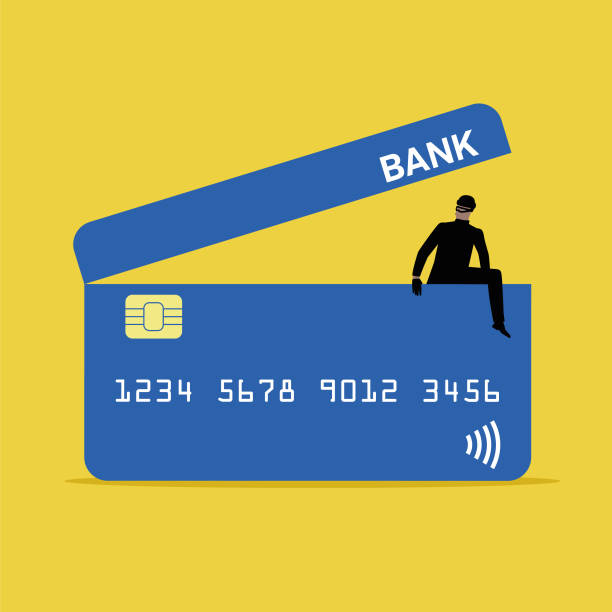

Blossom Bank also known as BB PLC is a multinational financial services group, that offers retail and investment banking, pension management, asset management and payments services, headquartered in London, UK. Blossom Bank wants to build a Machine Learning model to predict online payment fraud.
At the end of this project, we should be able to:
1. Effectively detect and identify anomalies in the transactions that would normaly be undetected using traditional methods
2. Improve it's cyber sercurity policies.
3. Solidify the trust in the platform and amongst their customers by preventing fraudulent transactions.
#### Data Dictionary
- step :represents unit of time where 1 step equals 1 hour
- type : type of online transaction
- amount : the amount of the transaction
- nameOrig : customer starting the transaction (sender)
- oldbalanceOrg: balance before the transaction
- newbalanceOrg: balance after the transaction
- newDest: recipient of the transaction (receiver)
- oldbalanceDest: initial balance of the recipient before the transaction
- newbalanceDest: the new balance of the recipient after the transaction
- isFraud: fraudulent transaction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as stm
import warnings
warnings.filterwarnings('ignore')

## Data Cleaning and Exploratory Data Analysis

In [2]:
#import the dataset
data=pd.read_csv("Online Payment Fraud Detection.csv", encoding='unicode-escape')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [3]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


In [4]:
#get a brief understanding of the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


- there are no empty cells and the data types are as they ought to be hence suggesting that the data is clean


In [5]:
#get a statistical view of the data
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [6]:
#the stucture or shape of the data
data.shape

(1048575, 10)

In [7]:
#what are the number of unique values in each column? This way I can identify columns to further explore
data.nunique()

step                   95
type                    5
amount            1009606
nameOrig          1048317
oldbalanceOrg      391033
newbalanceOrig     440792
nameDest           449635
oldbalanceDest     590110
newbalanceDest     437054
isFraud                 2
dtype: int64

In [8]:
#What transaction types does the company operate
data.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [9]:
#which of the transaction types is the most frequent
data.type.value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

In [10]:
#which of the transaction types generates the most money
data.groupby('type').amount.sum().sort_values(ascending=False)

type
CASH_OUT    6.876474e+10
TRANSFER    5.503644e+10
CASH_IN     3.859476e+10
PAYMENT     3.936097e+09
DEBIT       4.219599e+07
Name: amount, dtype: float64

In [11]:
#investigate how many times a customer started a transaction
data.nameOrig.value_counts()

C1214450722    2
C309111136     2
C1268675361    2
C720460198     2
C1109092856    2
              ..
C560131732     1
C455251560     1
C650578540     1
C1883668225    1
C1264356443    1
Name: nameOrig, Length: 1048317, dtype: int64

In [12]:
#maximum number of times a customer initiated a transaction
data.nameOrig.value_counts().max()

2

In [13]:
#How many times a recipient got a transaction
data.nameDest.value_counts()

C985934102     98
C1286084959    96
C1590550415    89
C248609774     88
C665576141     87
               ..
M382871047      1
M322765556      1
M1118794441     1
M1127250627     1
M677577406      1
Name: nameDest, Length: 449635, dtype: int64

In [14]:
#who are their top 20 customers, what kinda of transcations did they conduct and what was the total amount
data.groupby(['nameOrig','type']).amount.sum().sort_values(ascending=False)[:20]

nameOrig     type    
C7162498     TRANSFER    10000000.00
C1843531771  TRANSFER    10000000.00
C351297720   CASH_OUT    10000000.00
C824646662   CASH_OUT    10000000.00
C29118015    CASH_OUT    10000000.00
C1438388258  CASH_OUT    10000000.00
C2050703310  CASH_OUT    10000000.00
C1439740840  TRANSFER    10000000.00
C792651637   TRANSFER    10000000.00
C1079335762  CASH_OUT    10000000.00
C53057884    TRANSFER    10000000.00
C1237313447  TRANSFER    10000000.00
C538142346   CASH_OUT    10000000.00
C416779475   TRANSFER    10000000.00
C154757729   TRANSFER     9977761.05
C840795008   CASH_OUT     9977761.05
C1071702423  CASH_OUT     9887819.06
C1548903046  TRANSFER     9887819.06
C851016578   TRANSFER     9465988.82
C91276418    CASH_OUT     9465988.82
Name: amount, dtype: float64

In [15]:
#maximum number of times a customer was a recipient of a transaction
data.nameDest.value_counts().max()

98

- Our data shows that the maximum transactions done by a sender was 2. How is it possible for a receipient to receive money 98 times?  This suggests that either a customer has multiple accounts hence sending funds to the recipient account or something "funny" is going down!

In [16]:
data.groupby('nameDest').nameOrig.value_counts()

nameDest     nameOrig   
C1000015936  C145143154     1
             C1698310364    1
             C1862300551    1
             C186347284     1
             C1919167393    1
                           ..
M999968767   C968077860     1
M999981724   C1893921230    1
M999989895   C685245877     1
M999995419   C342232697     1
M999996397   C1135734932    1
Name: nameOrig, Length: 1048575, dtype: int64

In [17]:
#how does each variable affect the outcome of another?
data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,-0.025996,-0.006780,-0.007180,-0.002251,-0.019503,0.045030
amount,-0.025996,1.000000,0.004864,-0.001133,0.215558,0.311936,0.128862
oldbalanceOrg,-0.006780,0.004864,1.000000,0.999047,0.093305,0.064049,0.003829
newbalanceOrig,-0.007180,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.009438
oldbalanceDest,-0.002251,0.215558,0.093305,0.095182,1.000000,0.978403,-0.007552
newbalanceDest,-0.019503,0.311936,0.064049,0.063725,0.978403,1.000000,-0.000495
isFraud,0.045030,0.128862,0.003829,-0.009438,-0.007552,-0.000495,1.000000


- While there is a strong correlation between newbalanceOrig & oldbalanceOrg and oldbalanceDest & newbalanceDest, the other variables show no significant correlation hence they do not affect the outcomes of one another.

In [18]:
#what was the total amount transacted
data.amount.sum()

166374223863.37

In [19]:
#next, lets explore the column isFruad
fraud=data[data['isFraud']==1]
normal=data[data['isFraud']==0]

In [20]:
print(fraud.shape,normal.shape)

(1142, 10) (1047433, 10)


In [21]:
#for most transaction, what is the number of steps required before it is flagged as a normal or fraudulent transaction?
data.groupby(['isFraud','step']).step.sum()

isFraud  step
0        1       2692
         2       2012
         3       1644
         4       2220
         5       3295
                 ... 
1        91       728
         92       920
         93      1488
         94      1128
         95       760
Name: step, Length: 142, dtype: int64

In [22]:
#let's group the transaction type by if its fraudulent or not and the total number of steps for each
data.groupby(['type', 'isFraud'])['step'].sum()

type      isFraud
CASH_IN   0          6088547
CASH_OUT  0          9940130
          1            27691
DEBIT     0           185469
PAYMENT   0          9675077
TRANSFER  0          2331706
          1            27436
Name: step, dtype: int64

### Who are the top 10 losers to fraud?

In [23]:
data_loss=data.loc[data['isFraud']==1,['nameOrig','oldbalanceOrg','newbalanceOrig']]
data_loss['fraud_loss']=data_loss['oldbalanceOrg']-data_loss['newbalanceOrig']
data_loss.sort_values(by =['fraud_loss','oldbalanceOrg'],ascending=False)
data_loss.head(10)

,nameOrig,oldbalanceOrg,newbalanceOrig,fraud_loss
2,C1305486145,181.00,0.0,181.00
3,C840083671,181.00,0.0,181.00
251,C1420196421,2806.00,0.0,2806.00
252,C2101527076,2806.00,0.0,2806.00
680,C137533655,20128.00,0.0,20128.00
681,C1118430673,20128.00,0.0,20128.00
724,C749981943,0.00,0.0,0.00
969,C1334405552,1277212.77,0.0,1277212.77
970,C467632528,1277212.77,0.0,1277212.77
1115,C1364127192,35063.63,0.0,35063.63


- Customer C1334405552	 is the top losser with 1277212.77 



### Who are the top 10 customers that benefited from fraudulent transactions

In [24]:
data_gain=data.loc[data['isFraud']==1,['nameDest','oldbalanceDest','newbalanceDest']]
data_gain['fraud_gain']=data_gain['newbalanceDest']-data_gain['oldbalanceDest']
data_gain=data_gain.sort_values(by =['fraud_gain','newbalanceDest'],ascending=False)
data_gain.head(10)

,nameDest,oldbalanceDest,newbalanceDest,fraud_gain
1030662,C615227407,373274.84,10400000.00,10026725.16
1030560,C1089455271,81810.42,10100000.00,10018189.58
586312,C1379703840,0.00,10000000.00,10000000.00
1030688,C1917849910,0.00,10000000.00,10000000.00
1030710,C557678014,0.00,10000000.00,10000000.00
1005089,C1214752539,0.00,9977761.05,9977761.05
4441,C766681183,0.00,9941904.21,9941904.21
481251,C1622860679,504326.62,10300000.00,9795673.38
650134,C1220805115,0.00,9465988.82,9465988.82
586314,C28783325,801913.95,10200000.00,9398086.05


In [25]:
#the statistical information about the fraudulent transactions
fraud.amount.describe()

count    1.142000e+03
mean     1.192629e+06
std      2.030599e+06
min      1.190000e+02
25%      8.607017e+04
50%      3.531794e+05
75%      1.248759e+06
max      1.000000e+07
Name: amount, dtype: float64

In [26]:
#the statistical information about the normal transactions
normal.amount.describe()

count    1.047433e+06
mean     1.575397e+05
std      2.541883e+05
min      1.000000e-01
25%      1.213487e+04
50%      7.621497e+04
75%      2.134928e+05
max      6.419835e+06
Name: amount, dtype: float64

In [27]:
fraud.amount.sum()

1361982240.43

In [28]:
#Comparing both class of transactions
data.groupby('isFraud').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
isFraud,,,,,,
0,26.942944,1.575397e+05,8.736338e+05,894746.395080,978732.769117,1.114237e+06
1,48.272329,1.192629e+06,1.218636e+06,33944.321208,452866.124527,1.077940e+06


In [29]:
#percentage of fraudulent transactions
((fraud.amount.sum()/data.amount.sum())*100).round(2)

0.82

In [30]:
#In a random selection of transcations, how many of them will be fraudulent
#take some sample data
dataa= data.sample(frac = 0.2,random_state=1)
dataa.shape

(209715, 10)

In [31]:
Fraud = dataa[dataa['isFraud']==1]
Normal = dataa[dataa['isFraud']==0]
print("Fraud Transactions : {}".format(len(Fraud)))
print("Normal Transactions : {}".format(len(Normal)))

Fraud Transactions : 214
Normal Transactions : 209501


## Univariate Visualization

<AxesSubplot:ylabel='type'>

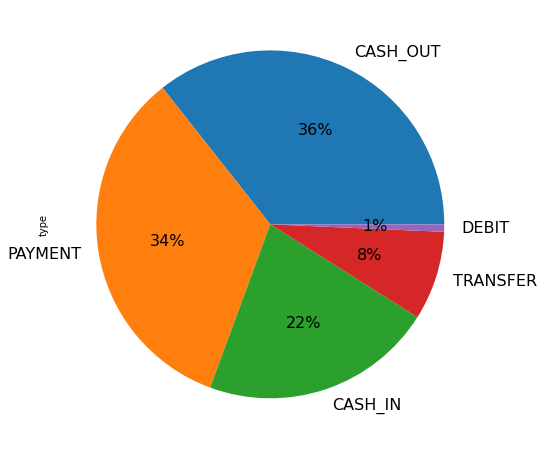

In [32]:
data.type.value_counts().plot(kind='pie', y='type', figsize = (10,8), fontsize = 16, autopct='%1.0f%%')

- The dataset shows that the most used transaction type is CASH_OUT with 36% followed by PAYMENT with 34% while DEBIT is the least type of transaction.

<AxesSubplot:ylabel='isFraud'>

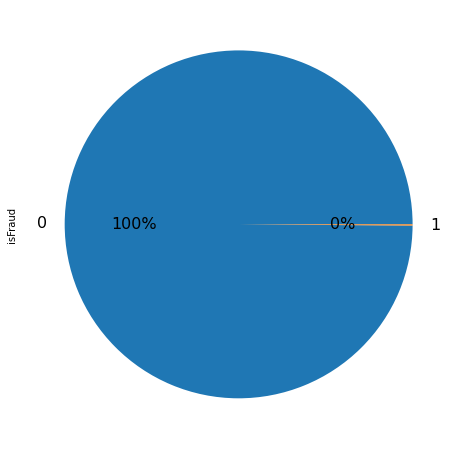

In [33]:
#observation on isFraud
data.isFraud.value_counts().plot(kind='pie', y='isFraud', figsize = (10,8), fontsize = 16, autopct='%1.0f%%')

- This shows that majority of the transaction are not fraudulent. It however suggests some disparities (Undersampling) with the dataset and this might have significant impact on the model. 

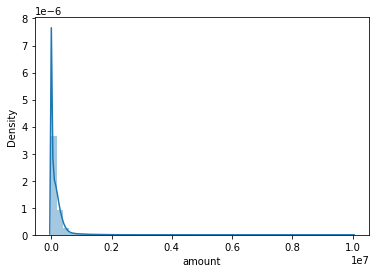

In [34]:
sns.distplot(data['amount']);

- This is positive/right skewed. It simply implies that the outliers of the distribution curve are further out towards the right and closer to the mean on the left.

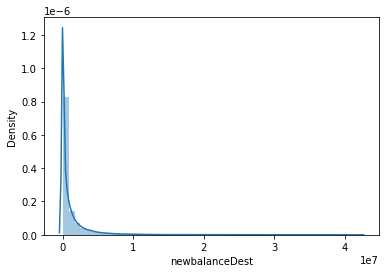

In [35]:
sns.distplot(data['newbalanceDest']);

In [36]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

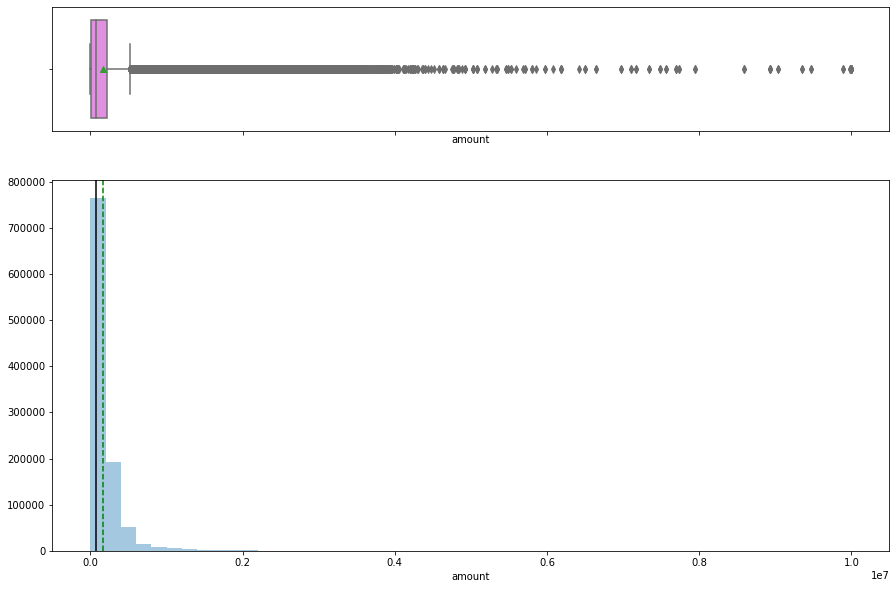

In [37]:
histogram_boxplot(data["amount"])

- Amount has some outliers which is expected as we have different class of people with different salary range.
- It's positively skewed.

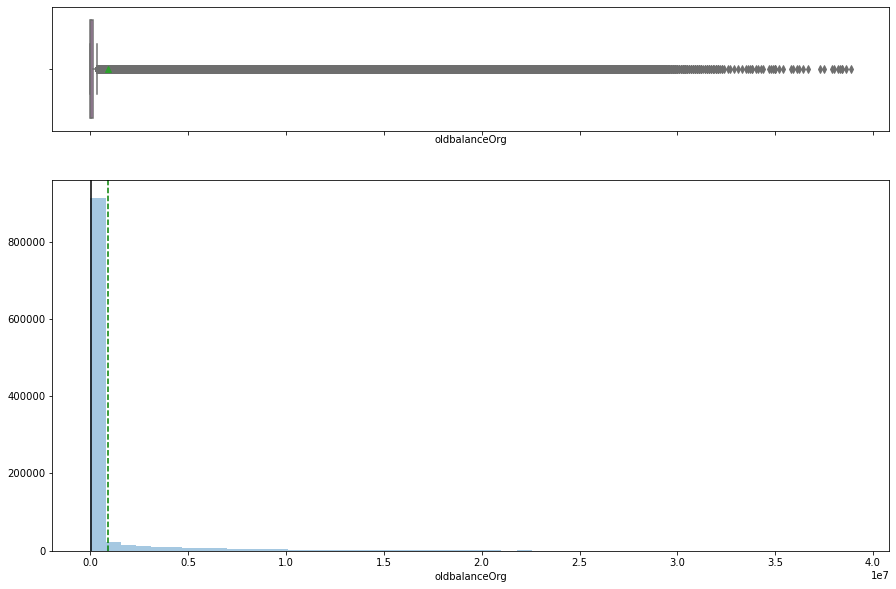

In [38]:
histogram_boxplot(data["oldbalanceOrg"])

- There are outliers in oldbalance
- It is positively skewed.


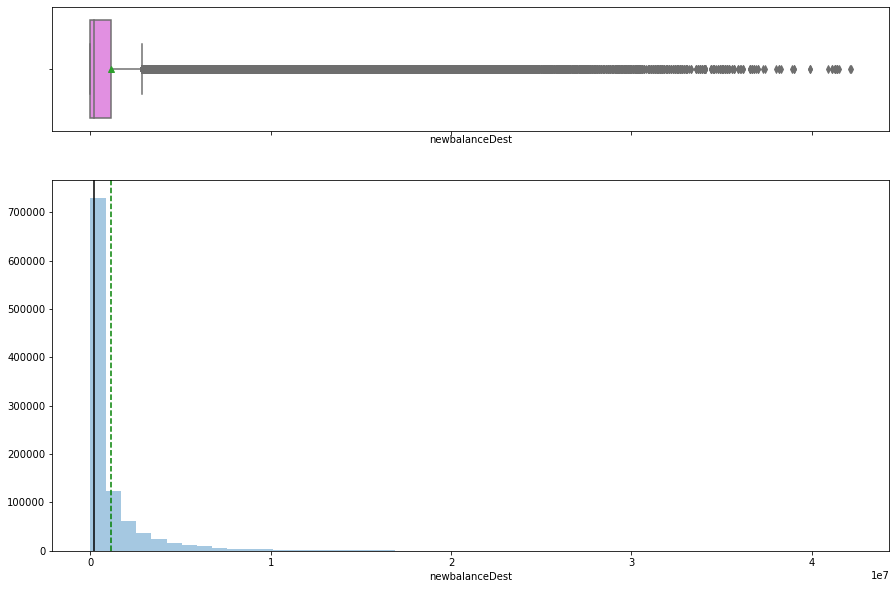

In [39]:
histogram_boxplot(data["newbalanceDest"])

- There are outliers in newbalanceDest
- It is positively skewed.

## Multivariate Visualization

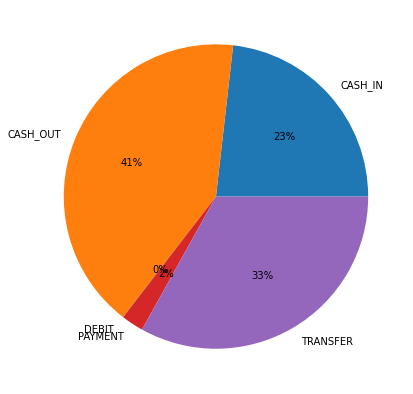

In [40]:
#observation on transaction type and amount
labels = data['type'].astype('category').cat.categories.tolist()
count = data.groupby('type').amount.sum()
fig = plt.figure(figsize =(12, 7))
plt.pie(count, labels=labels,autopct='%1.0f%%')
#autopct show the % on plot
plt.show()

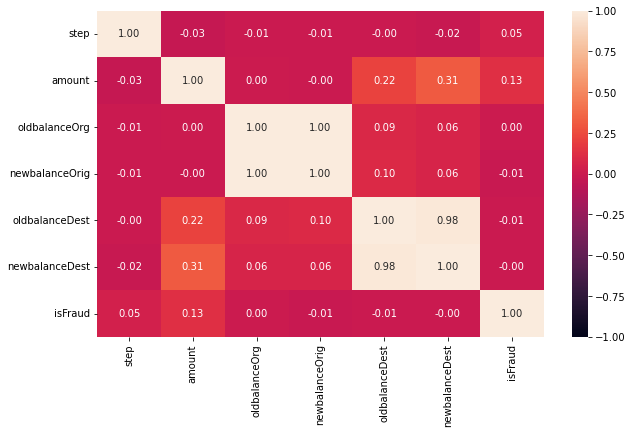

In [41]:
#heatmap showing the relationship between all the vriables
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1,fmt='.2f')
plt.show()

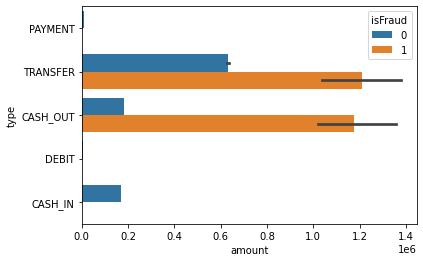

In [42]:
#a graphical representation of the distribution of fraudulent transactions in each transaction type
sns.barplot(x='amount', y='type', hue= 'isFraud', data=data)
plt.show()

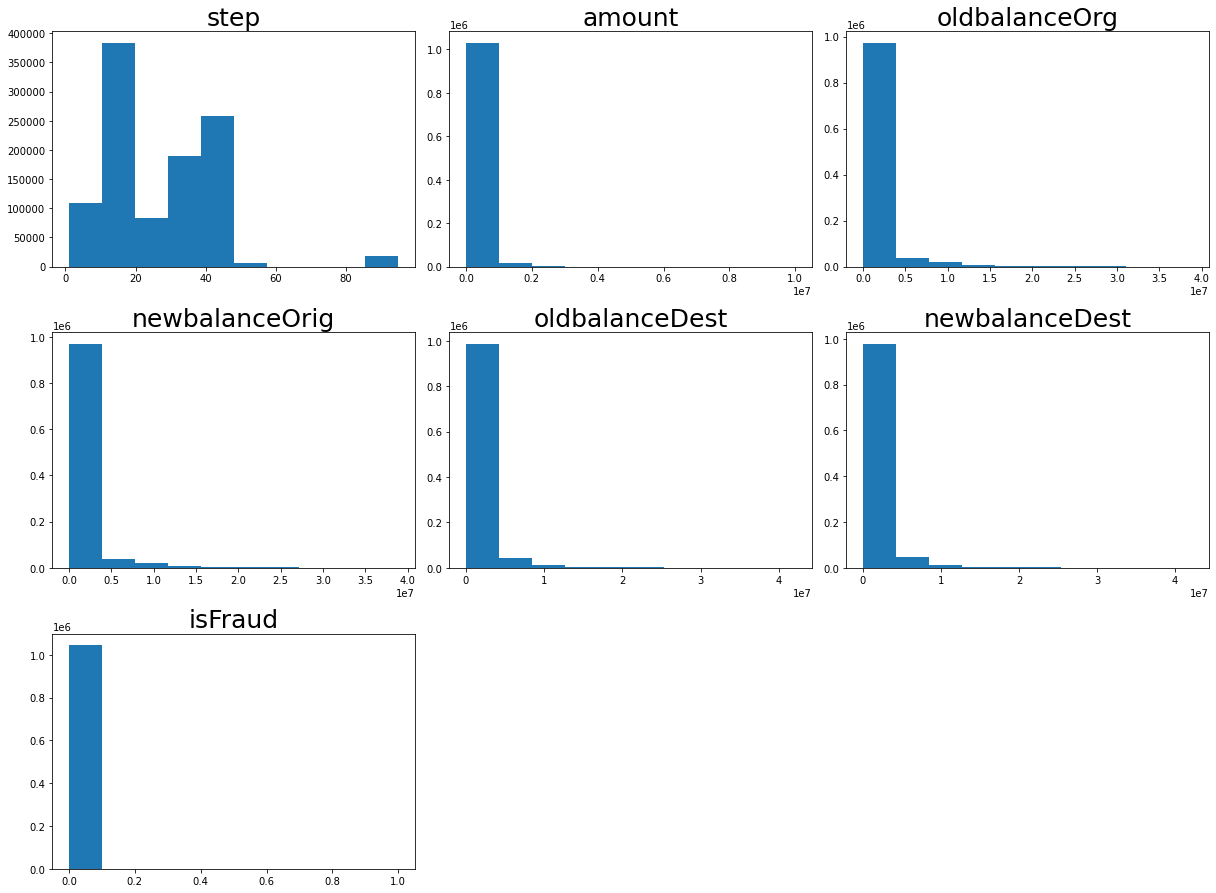

In [43]:
# lets plot histogram of all plots
from scipy.stats import norm
all_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(data[all_col[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)
    

plt.show()

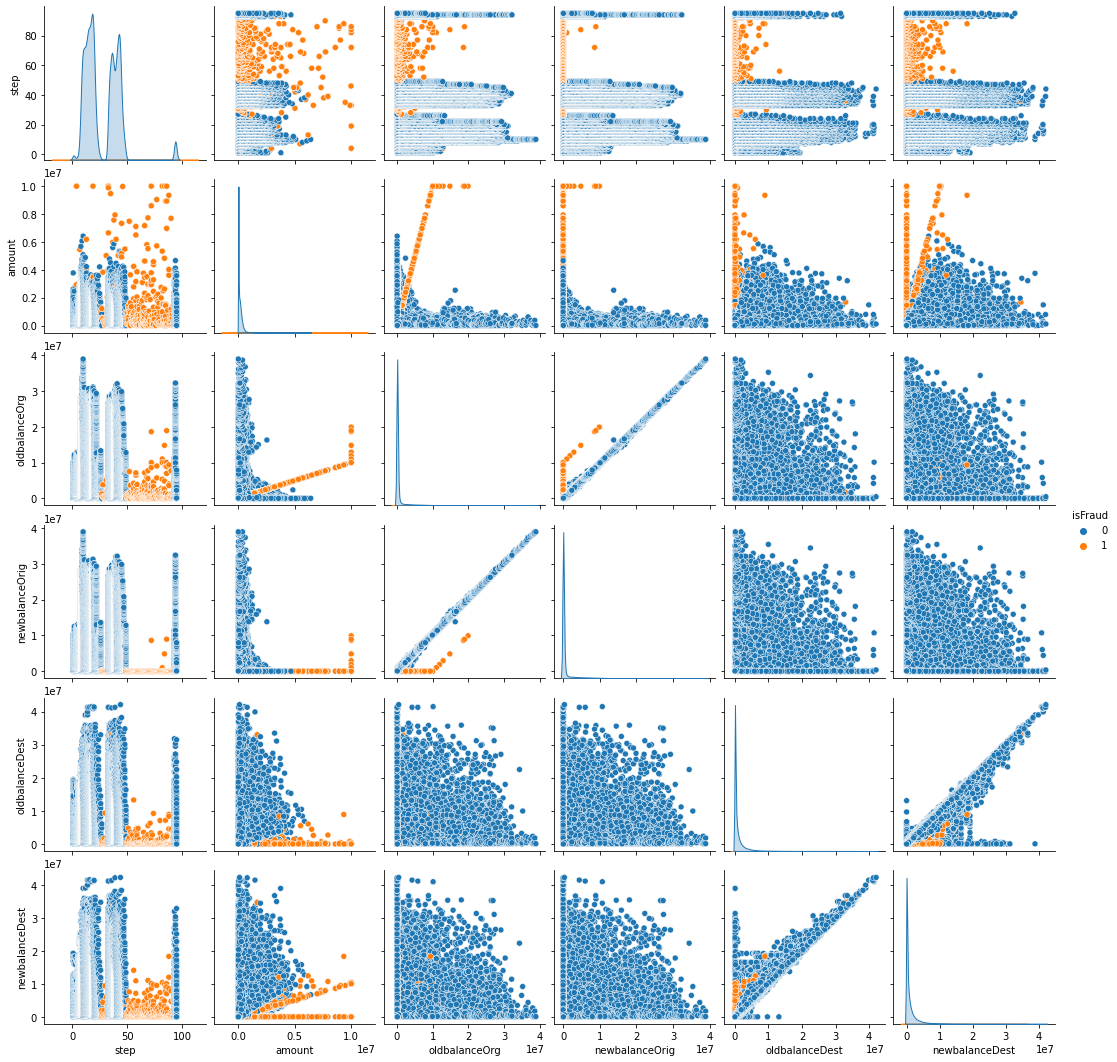

In [44]:
sns.pairplot(data=data,hue="isFraud")
plt.show()

## Modeling
## Supervised Learning
- Random Forest Model
- Logistic Regression Model
- Decision Tree Model

In [45]:
#import the necessary libries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

To train and test our machine learning model, first we will encode the categorical variables. This implies that because our dataset contains categorial values ('nameOrig', 'nameDest'), it's necessary to convert them into binary format so the model can work accurately

### Encoding Categorical Variables


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [47]:
#select categorical variables
#replace pass with your code
categorical = ["nameOrig","nameDest"]

In [48]:
#use pd.get_dummies() for one hot encoding
categories_dummies = pd.get_dummies(categorical)
categories_dummies.head()

,nameDest,nameOrig
0,0,1
1,1,0


In [49]:
#join the encoded variables back to the main dataframe using pd.concat()
data = pd.concat([data,categories_dummies], axis=1)
print(data.shape)
data.head()

(1048575, 12)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,nameDest,nameOrig
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0.0,1.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,1.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,NaN,NaN
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,NaN,NaN
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,NaN,NaN


In [50]:
#remove the initial categorical columns now that we have encoded them
data = data.drop(categorical,axis=1)
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


### Modelling

In [51]:
y = data['isFraud']
X = data.drop('isFraud', axis =1)

In [52]:
X = pd.get_dummies(X, columns=['type'], drop_first=True)
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,1,0


In [53]:
#split into training and validation sets using a 30% split ratio
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

### Train The Classification Model With A Decision Tree Classifier

In [54]:
#create the model
DC = DecisionTreeClassifier(random_state=20)
#fit the model
DC.fit(X_train, y_train)
#predict
DC_preds = DC.predict(X_test)
#check the accuracy of the model
print(accuracy_score(DC_preds,y_test))

0.9995740257428324


In [55]:
0.9996058148665016*100

99.96058148665016

In [56]:
print(classification_report(y_test, DC_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314226
           1       0.79      0.84      0.81       347

    accuracy                           1.00    314573
   macro avg       0.90      0.92      0.91    314573
weighted avg       1.00      1.00      1.00    314573



In [57]:
# check True Negatives/Positives, False Negatives/Positives
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,DC_preds), 
             columns=['Predicted Negative(0) ', 'Predicted Positive(1)'], 
             index=['Actually Negative(0)', 'Actually Positive(1)'])

,Predicted Negative(0),Predicted Positive(1)
Actually Negative(0),314149,77
Actually Positive(1),57,290


In [58]:
# Print confusion matrix using predictions in context 
tracy= pd.DataFrame(confusion_matrix(y_test,DC_preds), 
             columns=['Predicted Not Fraud(0) ', 'Predicted Fraud(1)'], 
             index=['Actually Not Fraud(0)', 'Actually Fraud(1)'])

Text(0.5, 42.0, 'Predicted label')

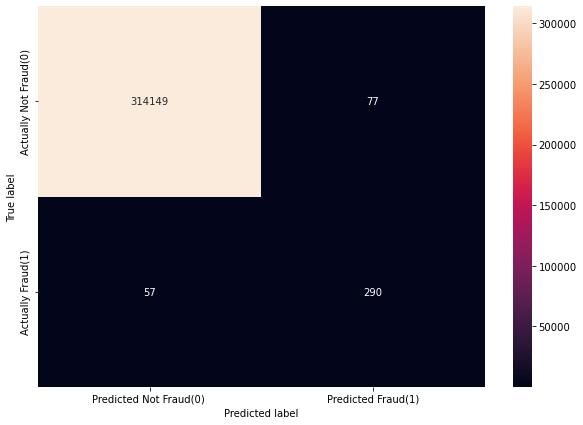

In [59]:
plt.figure(figsize = (10,7))
sns.heatmap(data=tracy,annot= True, fmt='')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Train The Classification Model With A Random Forest Classifier

In [60]:
#create the model
RC = RandomForestClassifier(random_state=20)
#fit the model
RC.fit(X_train, y_train)
#predict
RC_preds = RC.predict(X_test)
#check the accuracy of the model
print(accuracy_score(RC_preds,y_test))

0.9997965496085169


In [61]:
0.9997425080982792*100

99.97425080982792

In [62]:
print('\nClassification Report:')
print(classification_report(y_test, RC_preds))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314226
           1       0.99      0.83      0.90       347

    accuracy                           1.00    314573
   macro avg       0.99      0.91      0.95    314573
weighted avg       1.00      1.00      1.00    314573



In [63]:
# check True Negatives/Positives, False Negatives/Positives
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,RC_preds), 
             columns=['Predicted Negative(0) ', 'Predicted Positive(1)'], 
             index=['Actually Negative(0)', 'Actually Positive(1)'])

,Predicted Negative(0),Predicted Positive(1)
Actually Negative(0),314222,4
Actually Positive(1),60,287


In [64]:
# Print confusion matrix using predictions in context 
shola= pd.DataFrame(confusion_matrix(y_test,RC_preds), 
             columns=['Predicted Not Fraud(0) ', 'Predicted Fraud(1)'], 
             index=['Actually Not Fraud(0)', 'Actually Fraud(1)'])

Text(0.5, 42.0, 'Predicted label')

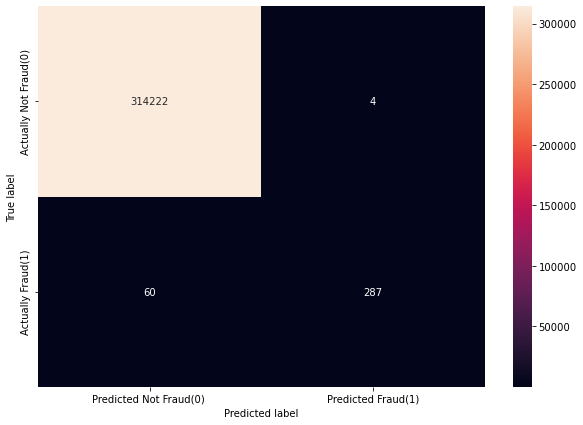

In [65]:
plt.figure(figsize = (10,7))
sns.heatmap(data=shola,annot= True, fmt='')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Train The Classification Model With A Logistic Regression Classifier

In [66]:
#data scaling steps for train data set
scaler = StandardScaler()
X_train_scaled  =scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, index=X_train.index, columns = X_train.columns)

In [67]:
#data scaling test for test dataset
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, index=X_test.index, columns = X_test.columns)

In [68]:
#initialize the logistic regression model
LR = LogisticRegression(random_state=20)
#train the model
LR.fit(X_train,y_train)
#predict and store your predictions to a variable
LR_preds = LR.predict(X_test)
print(accuracy_score(LR_preds,y_test))

0.9991925562588017


In [69]:
0.9992752079803416*100

99.92752079803417

In [70]:
print('\nClassification Report:')
print(classification_report(y_test, LR_preds))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314226
           1       0.95      0.28      0.44       347

    accuracy                           1.00    314573
   macro avg       0.98      0.64      0.72    314573
weighted avg       1.00      1.00      1.00    314573



In [71]:
# check True Negatives/Positives, False Negatives/Positives
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,LR_preds), 
             columns=['Predicted Negative(0) ', 'Predicted Positive(1)'], 
             index=['Actually Negative(0)', 'Actually Positive(1)'])

,Predicted Negative(0),Predicted Positive(1)
Actually Negative(0),314221,5
Actually Positive(1),249,98


In [72]:
# Print confusion matrix using predictions in context 
pd.DataFrame(confusion_matrix(y_test,LR_preds), 
             columns=['Predicted Not Fraud(0) ', 'Predicted Fraud(1)'], 
             index=['Actually Not Fraud(0)', 'Actually Fraud(1)'])

,Predicted Not Fraud(0),Predicted Fraud(1)
Actually Not Fraud(0),314221,5
Actually Fraud(1),249,98


In [73]:
# Print confusion matrix using predictions in context 
tade= pd.DataFrame(confusion_matrix(y_test,LR_preds), 
             columns=['Predicted Not Fraud(0) ', 'Predicted Fraud(1)'], 
             index=['Actually Not Fraud(0)', 'Actually Fraud(1)'])

Text(0.5, 42.0, 'Predicted label')

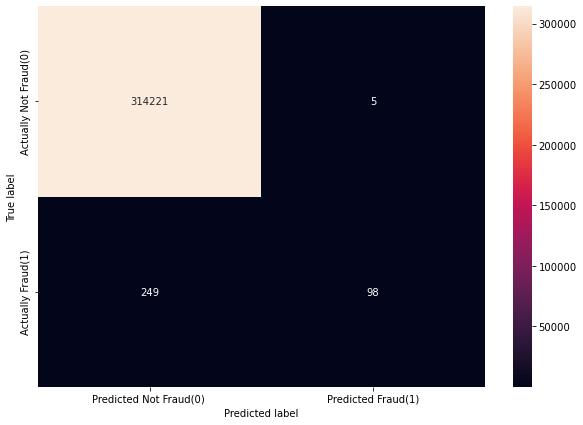

In [74]:
plt.figure(figsize = (10,7))
sns.heatmap(data=tade,annot= True, fmt='')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### In relations to accuracy, it appears that Random Forect Model is the most accurate

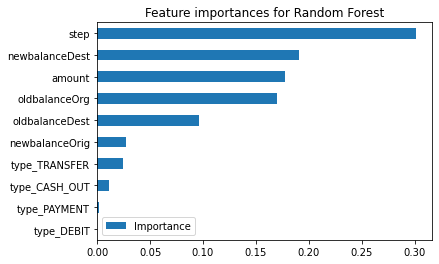

In [75]:
#get feature importances
RC_importances = pd.DataFrame(data = RC.feature_importances_,index = X_test.columns, columns=['Importance'])
#plot top 10 feature importances, sorted
RC_importances[:10].sort_values(by='Importance').plot.barh()
plt.title('Feature importances for Random Forest')
plt.show()